In [1]:
library(psych) #for describing data
library(lme4) # multilevel models
library(simr)  #for power analysis simualtions
library(ggplot2) # for data visualization
library(plyr)  # for data manipulation

Warning message:
"程辑包'psych'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'lme4'是用R版本4.2.3 来建造的"
载入需要的程辑包：Matrix

Warning message:
"程辑包'Matrix'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'simr'是用R版本4.2.3 来建造的"

载入程辑包：'simr'


The following object is masked from 'package:lme4':

    getData


Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"

载入程辑包：'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"程辑包'plyr'是用R版本4.2.3 来建造的"


##### 载入数据

In [2]:
#set filepath for data file
filepath <- "https://quantdev.ssri.psu.edu/sites/qdev/files/BLdata_time.csv"
#read in the .csv file using the url() function
data_intimacy <- read.csv(file=url(filepath),header=TRUE)

##### 描述数据

In [3]:
#describing the data
describe(data_intimacy)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,800,25.500000,14.4398974,25.50,25.500000,18.532500,1,50.00,49.00,0.000000e+00,-1.20545517,0.51052747
time,2,800,7.500000,4.6126560,7.50,7.500000,5.930400,0,15.00,15.00,0.000000e+00,-1.21388544,0.16308202
time01,3,800,0.500000,0.3075104,0.50,0.500000,0.395360,0,1.00,1.00,-6.018089e-08,-1.21388548,0.01087213
intimacy,4,800,3.468713,1.6347428,3.33,3.429922,1.608621,0,9.41,9.41,2.800347e-01,-0.06138059,0.05779689
treatment,5,800,0.500000,0.5003128,0.50,0.500000,0.741300,0,1.00,1.00,0.000000e+00,-2.00249844,0.01768873


In [ ]:
#number of persons
length(unique(data_intimacy$id))

In [ ]:
#number of occasions
length(unique(data_intimacy$time))

In [ ]:
#crossing of persons and occasions
xtabs(~id+time, data=data_intimacy)

## 用手头数据建模

In [4]:
#Run linear growth model with AR(1) errors 
fit_lgmodel <- lmer(intimacy ~ 1 + time01 + treatment + time01:treatment + 
                      (1 + time01 | id),
                    data=data_intimacy,
                    na.action = na.exclude)
#examine model summary
summary(fit_lgmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: intimacy ~ 1 + time01 + treatment + time01:treatment + (1 + time01 |  
    id)
   Data: data_intimacy

REML criterion at convergence: 2834.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6242 -0.6798 -0.0190  0.6433  2.4463 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 id       (Intercept) 0.6858   0.8281        
          time01      1.8936   1.3761   -0.45
 Residual             1.6925   1.3010        
Number of obs: 800, groups:  id, 50

Fixed effects:
                 Estimate Std. Error t value
(Intercept)       2.89897    0.20703  14.003
time01            0.73520    0.34720   2.118
treatment        -0.05644    0.29279  -0.193
time01:treatment  0.92143    0.49101   1.877

Correlation of Fixed Effects:
            (Intr) time01 trtmnt
time01      -0.599              
treatment   -0.707  0.423       
tm01:trtmnt  0.423 -0.707 -0.599

#### 使用蒙地卡罗法估计 power

In [5]:
#Power for the effect of interest
SimPower_Direct<-powerSim(fit_lgmodel,test=fixed("time01","lr"),
                          seed=1234, #set for replication
                          nsim=100, alpha=.05, progress=TRUE) #options

Simulating: |                                                                 Simulating: |=                                                                Simulating: |==                                                               Simulating: |===                                                              Simulating: |====                                                             Simulating: |=====                                                            Simulating: |======                                                           Simulating: |=======                                                          Simulating: |========                                                         Simulating: |=========                                                        Simulating: |==========                                                       Simulating: |===========                                                      Simulating: |============                                       

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [6]:
#examine post-hoc power
SimPower_Direct

Power for predictor 'time01', (95% confidence interval):
      62.00% (51.75, 71.52)

Test: Likelihood ratio
      Effect size for time01 is 0.74

Based on 100 simulations, (100 warnings, 0 errors)
alpha = 0.05, nrow = 800

Time elapsed: 0 h 0 m 13 s

nb: result might be an observed power calculation

可见，power仅有62%，不够

In [7]:
#Power for the effect of interest
SimPower_Direct<-powerSim(fit_lgmodel,test=fixed("treatment","lr"),
                          seed=1234, #set for replication
                          nsim=100, alpha=.05, progress=FALSE) #options

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [8]:
#examine post-hoc power
SimPower_Direct

Power for predictor 'treatment', (95% confidence interval):
       5.00% ( 1.64, 11.28)

Test: Likelihood ratio
      Effect size for treatment is -0.056

Based on 100 simulations, (100 warnings, 0 errors)
alpha = 0.05, nrow = 800

Time elapsed: 0 h 0 m 11 s

nb: result might be an observed power calculation

In [9]:
#Power for the effect of interest
SimPower_Direct<-powerSim(fit_lgmodel,test=fixed("time01:treatment","lr"),
                          seed=1234, #set for replication
                          nsim=100, alpha=.05, progress=FALSE) #options

boundary (singular) fit: see help('isSingular')

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [10]:
#examine post-hoc power
SimPower_Direct

Power for predictor 'time01:treatment', (95% confidence interval):
      45.00% (35.03, 55.27)

Test: Likelihood ratio
      Effect size for time01:treatment is 0.92

Based on 100 simulations, (1 warning, 0 errors)
alpha = 0.05, nrow = 800

Time elapsed: 0 h 0 m 12 s

nb: result might be an observed power calculation

In [11]:
#extending number of persons 
fit_lgmodelpersons <- extend(fit_lgmodel, along="id", n=200)

#checking length of data, number of persons
length(unique(getData(fit_lgmodelpersons)$id))

[1] 200

In [12]:
#checking length of data, number of times
length(unique(getData(fit_lgmodelpersons)$time))

[1] 16

In [13]:
#extending number of occasions 
fit_lgmodeltimes <- extend(fit_lgmodel, along="time", n=60)

#checking length of data, number of persons
length(unique(getData(fit_lgmodeltimes)$id))

[1] 50

In [14]:
#checking length of data, number of times
length(unique(getData(fit_lgmodeltimes)$time))

[1] 60

In [15]:
#running power curve
powerCurve_persons <- powerCurve(fit_lgmodelpersons, 
                                fixed("time01:treatment", "lr"),
                                along = "id",
                                breaks = c(32,63,94,125,157,188),
                                nsim=100,alpha=.05, progress=FALSE)

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [16]:
#examining power estiamtes
summary(powerCurve_persons)

nrow,nlevels,successes,trials,mean,lower,upper
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
512,32,28,100,0.28,0.1947936,0.3786670
1008,63,54,100,0.54,0.4374116,0.6401566
1504,94,76,100,0.76,0.6642645,0.8397754
2000,125,87,100,0.87,0.7879593,0.9289270
2512,157,92,100,0.92,0.8484424,0.9648284
3008,188,98,100,0.98,0.9296161,0.9975687


In [17]:
#running power curve
powerCurve_times <-powerCurve(fit_lgmodeltimes, 
                              fixed("time01:treatment", "lr"),
                              within = "id",
                              breaks = c(10,20,30,40,50,60),
                              nsim=100,alpha=.05, progress=FALSE)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Warning message in observedPowerWarning(sim):
"This appears to be an "observed power" calculation"


In [18]:
#examining power estiamtes
summary(powerCurve_times)

nrow,nlevels,successes,trials,mean,lower,upper
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
500,10,29,100,0.29,0.2035742,0.3892660
1000,20,49,100,0.49,0.3886442,0.5919637
1500,30,51,100,0.51,0.4080363,0.6113558
2000,40,54,100,0.54,0.4374116,0.6401566
2500,50,59,100,0.59,0.4871442,0.6873800
3000,60,60,100,0.60,0.4972092,0.6967052


In [19]:
#preparing persons power curve data
powerdata_persons <- as.data.frame(summary(powerCurve_persons))
powerdata_persons$persons <- powerdata_persons$nlevels
powerdata_persons$times <- 16
powerdata_persons$design <- "persons"

#preparing times power curve data
powerdata_times <- as.data.frame(summary(powerCurve_times))
powerdata_times$persons <-50
powerdata_times$times <- powerdata_times$nlevels
powerdata_times$design <- "times"

#merging together
powerdata_all <- rbind(powerdata_persons, powerdata_times)

Warning message:
"Use of `powerdata_all$design` is discouraged.
i Use `design` instead."


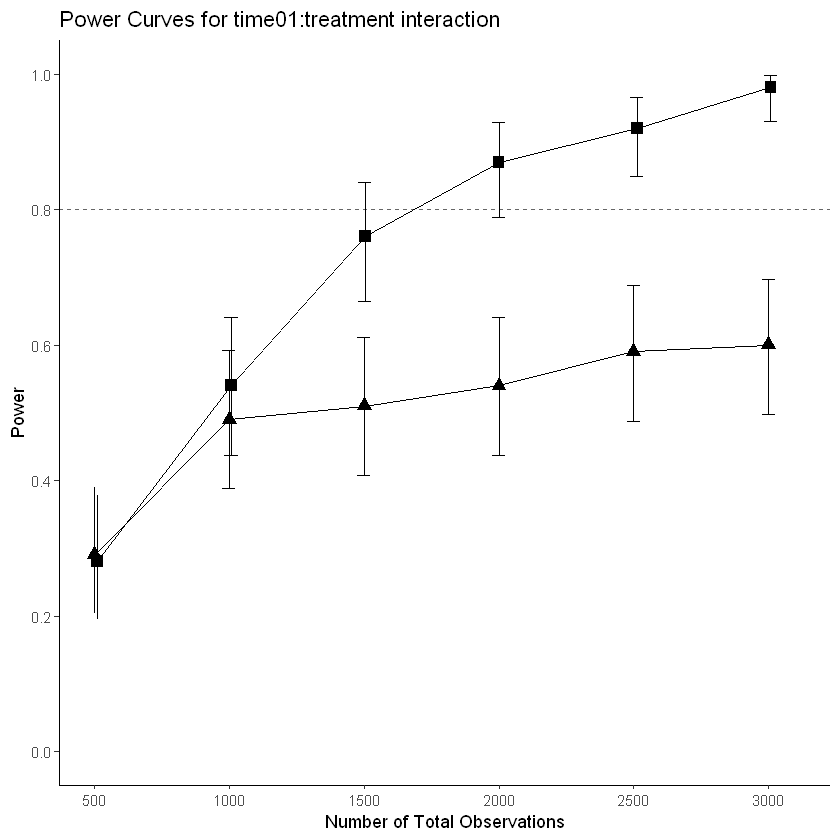

In [20]:
#Plotting curves
ggplot(data = powerdata_all,
       aes(y = mean, x=nrow, group=factor(design))) +
  #power goal
  geom_hline(yintercept=0.8, color="gray40",lty = 2) +
  #persons curve
  geom_line(color="black") +
  geom_errorbar(ymin=powerdata_all$lower,ymax=powerdata_all$upper, width=50, color="black") +
  geom_point(aes(shape=factor(powerdata_all$design)),size=3, color="black", show.legend = FALSE) +
  scale_shape_manual(values=c(15,17)) +
  scale_x_continuous(limits=c(500,3100),
                     breaks=c(500,1000,1500,2000,2500,3000),
                     name="Number of Total Observations") +
  scale_y_continuous(limits=c(0,1.0), 
                     breaks=c(0,.2,.4,.6,.8,1.0), 
                     name="Power") +  
  theme_classic() +
  #theme(axis.title=element_text(size=14),
  #      axis.text=element_text(size=14),
  #      plot.title=element_text(size=14, hjust=.5)) +
  ggtitle("Power Curves for time01:treatment interaction")